#MODULE_2_ML: ASSIGNMENT.

- - - - -

#EDA _ Assignment Questions

##EDA - 1  (Bike Details Dataset)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your file within your Google Drive
# Make sure to adjust the path if your file is located in a different folder
file_path = '/content/drive/My Drive/PW_Skills/ML/M2/BIKE DETAILS.csv'

# Print the current working directory
print(os.getcwd())

# Load the dataset using the file path
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [11]:
# 1. What is the range of selling prices in the dataset?
price_range = (df["selling_price"].min(), df["selling_price"].max())
print(f"Selling Price Range: {price_range}")

Selling Price Range: (5000, 760000)


In [12]:
# 2. What is the median selling price for bikes in the dataset?
median_price = df["selling_price"].median()
print(f"Median Selling Price: {median_price}")

Median Selling Price: 45000.0


In [13]:
# 3. What is the most common seller type?
most_common_seller = df["seller_type"].mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")

Most Common Seller Type: Individual


In [14]:
# 4. How many bikes have driven more than 50,000 kilometers?
high_mileage_bikes = df[df["km_driven"] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {high_mileage_bikes}")

Bikes driven more than 50,000 km: 170


In [15]:
# 5. What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
print("Average km_driven per ownership type:\n", avg_km_by_owner)

Average km_driven per ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [16]:
# 6. What proportion of bikes are from the year 2015 or older?
old_bikes_ratio = (df[df["year"] <= 2015].shape[0] / df.shape[0]) * 100
print(f"Proportion of bikes from 2015 or older: {old_bikes_ratio:.2f}%")

Proportion of bikes from 2015 or older: 56.64%


In [17]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [18]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
max_ex_showroom = df["ex_showroom_price"].max()
max_ex_showroom_bike = df[df["ex_showroom_price"] == max_ex_showroom]["name"].values[0]
print(f"Highest Ex-Showroom Price: {max_ex_showroom} for {max_ex_showroom_bike}")

Highest Ex-Showroom Price: 1278000.0 for Harley-Davidson Street Bob


In [19]:
# 9. What is the total number of bikes listed by each seller type?
seller_counts = df["seller_type"].value_counts()
print("Total bikes listed by each seller type:\n", seller_counts)

Total bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


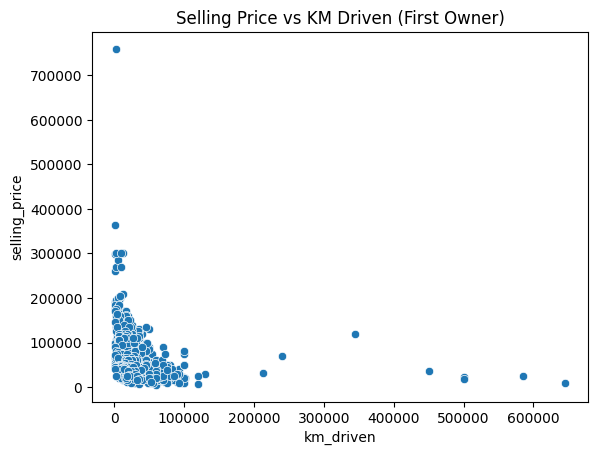

In [20]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(data=df[df["owner"] == "1st owner"], x="km_driven", y="selling_price")
plt.title("Selling Price vs KM Driven (First Owner)")
plt.show()

In [21]:
# 11. Identify and remove outliers in the km_driven column using the IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df["km_driven"] >= (Q1 - 1.5 * IQR)) & (df["km_driven"] <= (Q3 + 1.5 * IQR))]


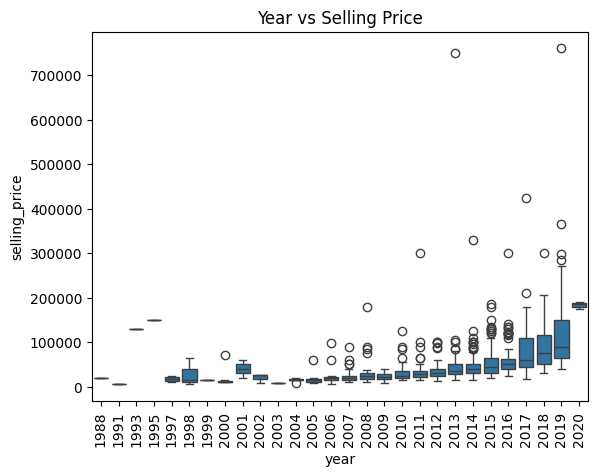

In [23]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.show()

In [24]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df["bike_age"] = current_year - df["year"]
depreciation = df.groupby("bike_age")["selling_price"].mean()
print("Average depreciation in selling price per year:\n", depreciation)

Average depreciation in selling price per year:
 bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [25]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_by_year = df.groupby("year")["selling_price"].mean()
outliers = df[df.apply(lambda row: row["selling_price"] > avg_price_by_year[row["year"]] * 1.5, axis=1)]["name"]
print("Bikes priced significantly above average:", outliers.unique())


Bikes priced significantly above average: ['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street 750' 'TVS Apache RR310' 'BMW G310

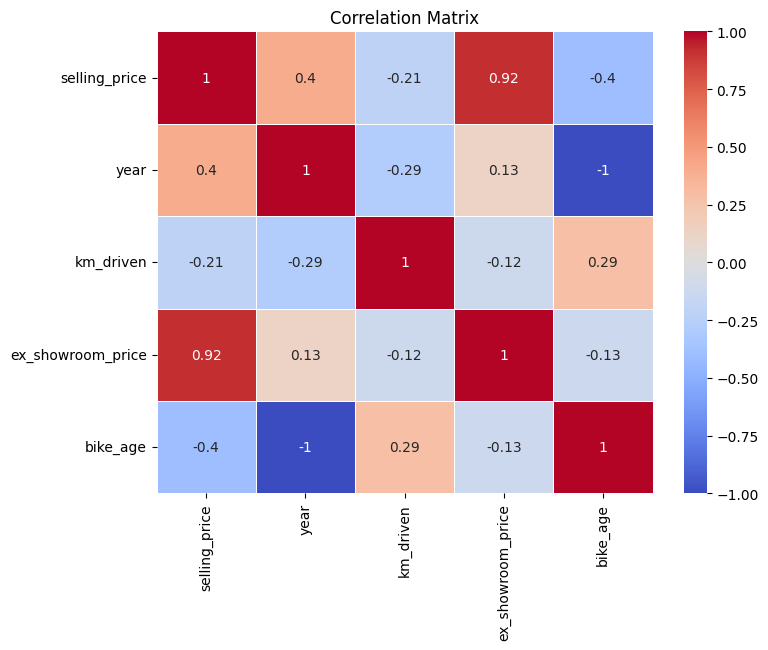

In [26]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- - - - -

##EDA - 2 (Car Sale Dataset)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your file within your Google Drive
# Make sure to adjust the path if your file is located in a different folder
file_path = '/content/drive/My Drive/PW_Skills/ML/M2/Car Sale.csv'

# Print the current working directory
print(os.getcwd())

# Load the dataset using the file path
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [28]:
# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [29]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print("Average Selling Price per Dealer:\n", avg_price_by_dealer)

Average Selling Price per Dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.

In [30]:
# 2. Which car brand (Company) has the highest variation in prices?
price_variation_by_company = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("Price Variation by Car Brand:\n", price_variation_by_company)

Price Variation by Car Brand:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


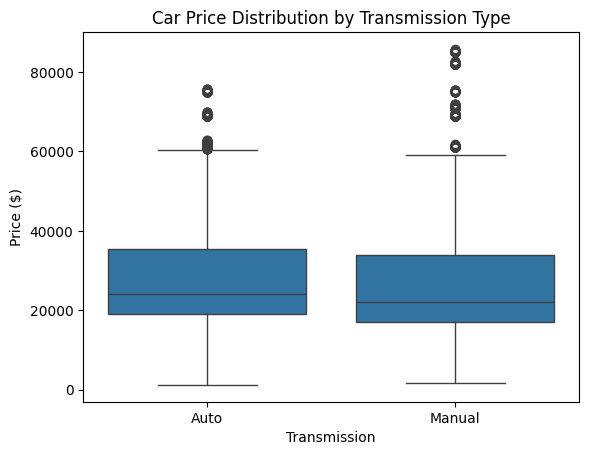

In [31]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=df, x="Transmission", y="Price ($)")
plt.title("Car Price Distribution by Transmission Type")
plt.show()


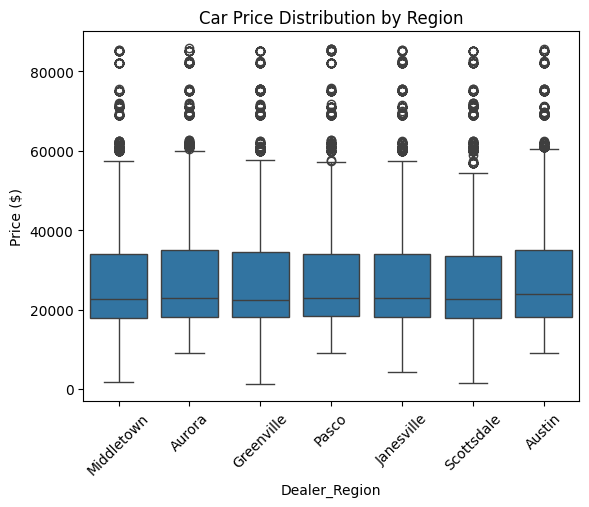

In [32]:
# 4. What is the distribution of car prices across different regions?
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Region")
plt.show()

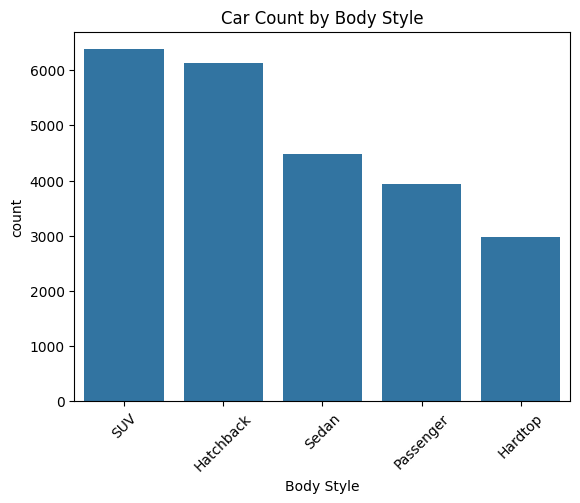

In [33]:
# 5. What is the distribution of cars based on body styles?
sns.countplot(data=df, x="Body Style", order=df["Body Style"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Car Count by Body Style")
plt.show()

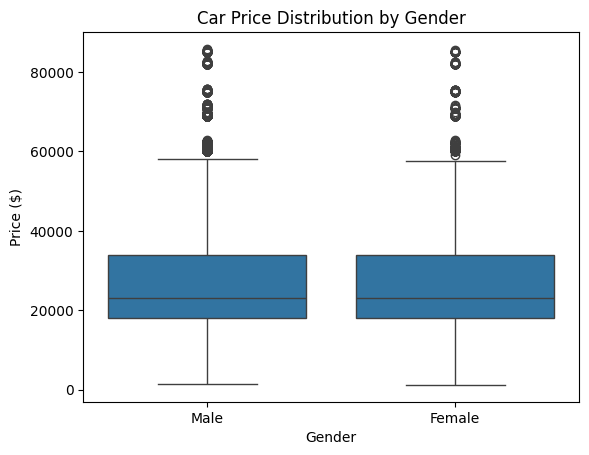

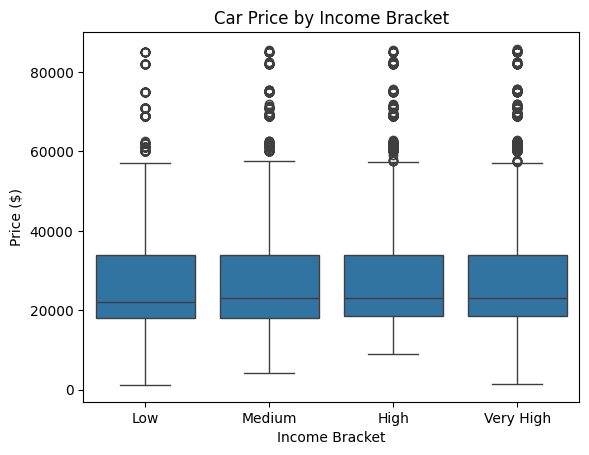

In [35]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
sns.boxplot(data=df, x="Gender", y="Price ($)")
plt.title("Car Price Distribution by Gender")
plt.show()
df["Income Bracket"] = pd.qcut(df["Annual Income"], q=4, labels=["Low", "Medium", "High", "Very High"])
sns.boxplot(data=df, x="Income Bracket", y="Price ($)")
plt.title("Car Price by Income Bracket")
plt.show()

<ipython-input-36-32589e717c27>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Dealer_Region", y="Price ($)", ci=None)


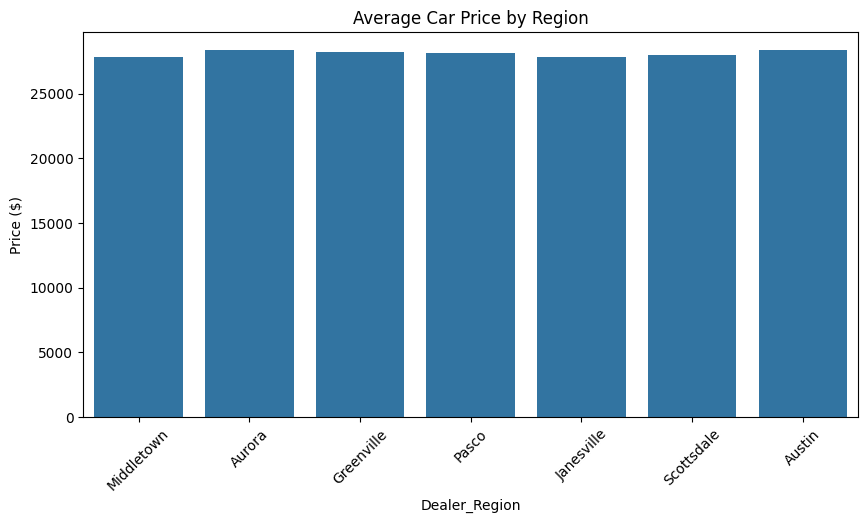

In [36]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Dealer_Region", y="Price ($)", ci=None)
plt.xticks(rotation=45)
plt.title("Average Car Price by Region")
plt.show()

In [37]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean().sort_values()
print("Average Price by Engine Type:\n", avg_price_by_engine)

Average Price by Engine Type:
 Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64


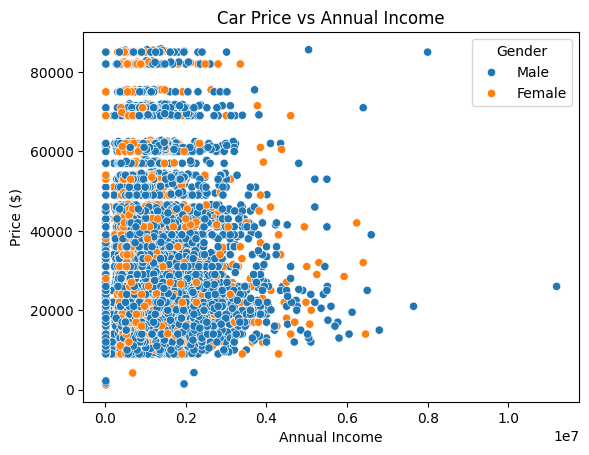

In [38]:
# 9. How do car prices vary based on the customer’s annual income bracket?
sns.scatterplot(data=df, x="Annual Income", y="Price ($)", hue="Gender")
plt.title("Car Price vs Annual Income")
plt.show()

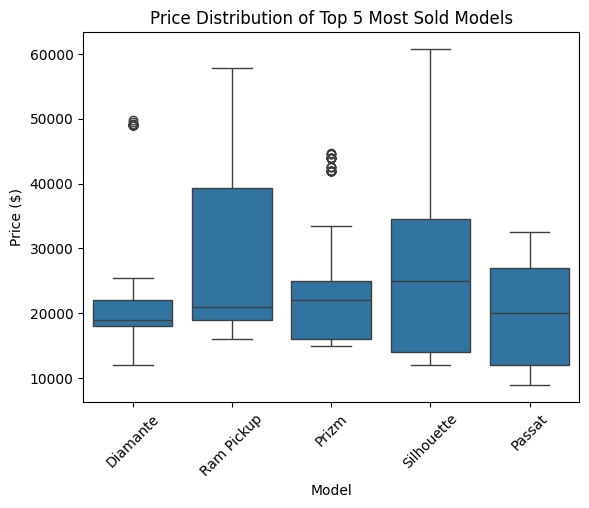

In [39]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df["Model"].value_counts().head(5).index
sns.boxplot(data=df[df["Model"].isin(top_5_models)], x="Model", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution of Top 5 Most Sold Models")
plt.show()

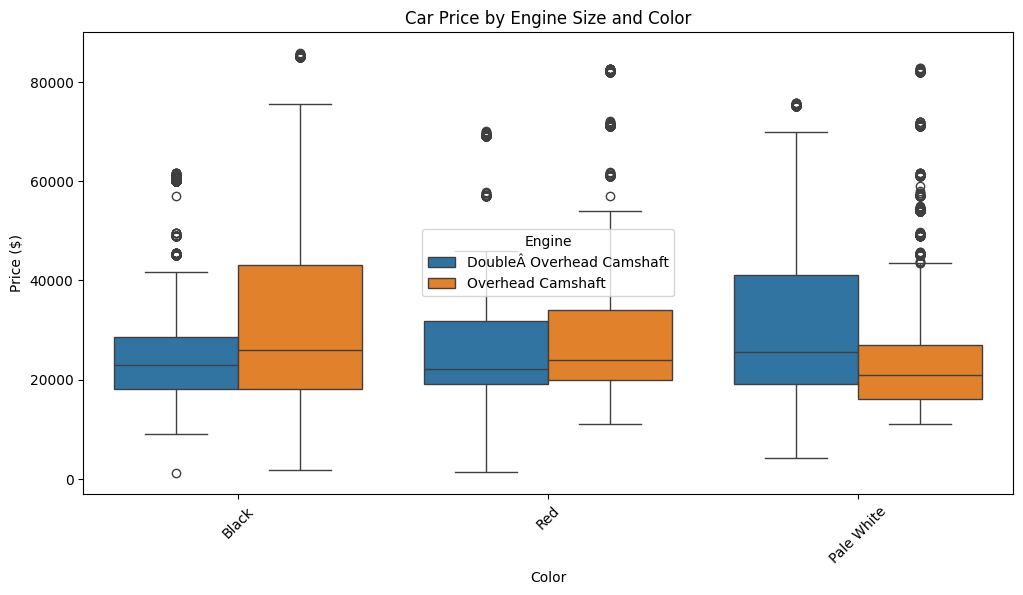

In [40]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Color", y="Price ($)", hue="Engine")
plt.xticks(rotation=45)
plt.title("Car Price by Engine Size and Color")
plt.show()

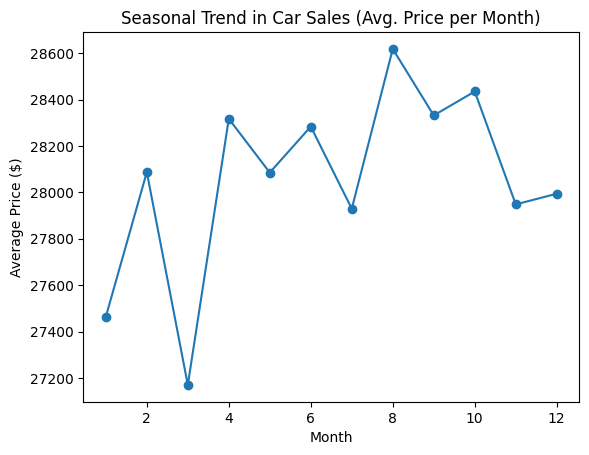

In [41]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month")["Price ($)"].mean()
plt.plot(monthly_sales, marker="o")
plt.title("Seasonal Trend in Car Sales (Avg. Price per Month)")
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.show()

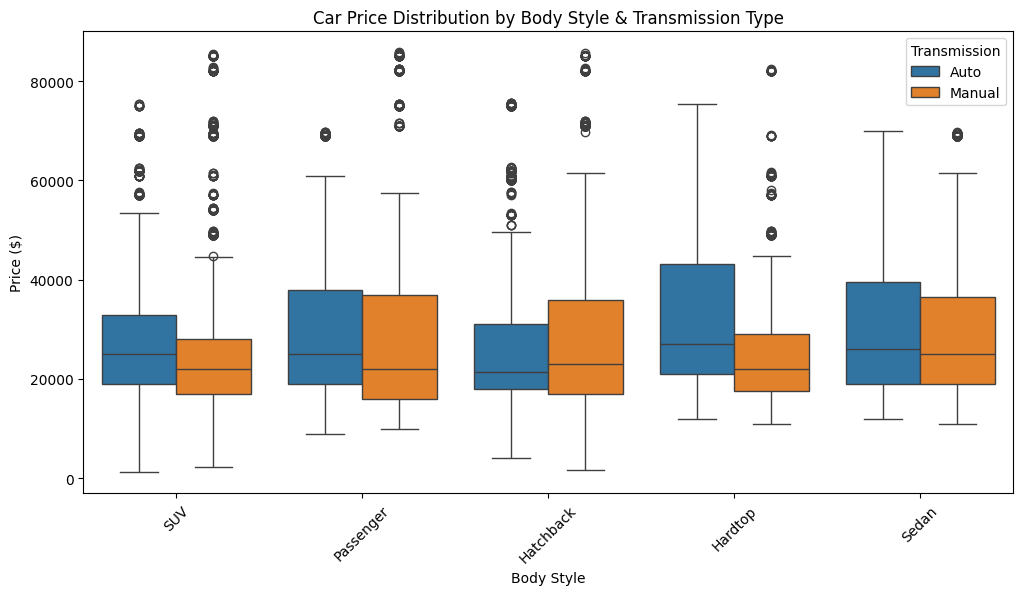

In [42]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission")
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style & Transmission Type")
plt.show()

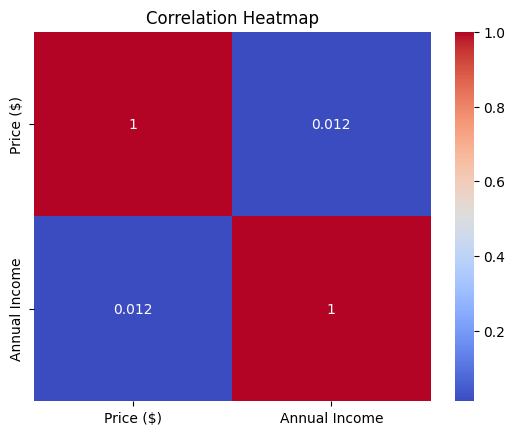

In [43]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
corr_matrix = df[["Price ($)", "Annual Income"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().unstack()
print("Average Price by Model and Engine Type:\n", avg_price_by_model_engine)

Average Price by Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


- - - - -

##EDA - 3 (Amazon Sales Dataset)

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/PW_Skills/ML/M2/amazon.csv'
print(os.getcwd())
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [55]:
# 1. What is the average rating for each product category?
avg_rating_by_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)
print("Average Rating per Category:\n", avg_rating_by_category)

Average Rating per Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acc

In [57]:
# 2. What are the top rating_count products by category?
# Convert 'rating_count' to numeric, handling errors
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
# errors='coerce' will replace non-numeric values with NaN

top_rated_products = df.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))[["product_name", "rating_count"]]
print("Top Rating Count Products by Category:\n", top_rated_products)

Top Rating Count Products by Category:
                                                                                               product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- 

<ipython-input-57-72e0be2fbd32>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_products = df.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))[["product_name", "rating_count"]]


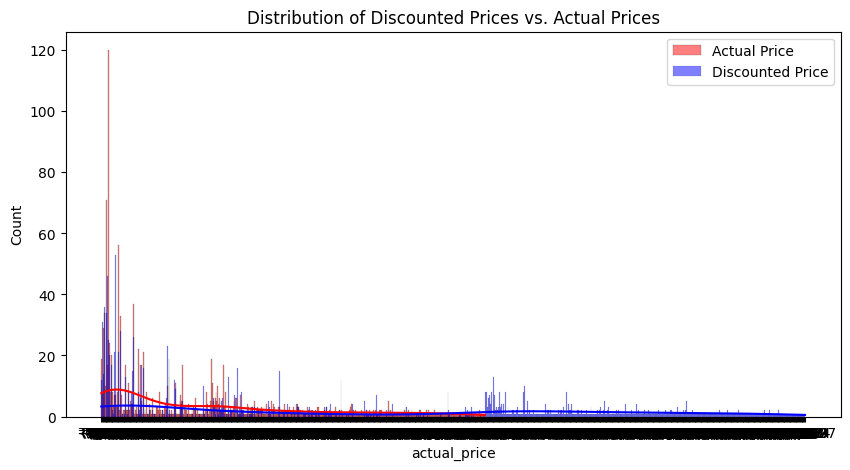

In [49]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10,5))
sns.histplot(df["actual_price"], label="Actual Price", kde=True, color="red", bins=30)
sns.histplot(df["discounted_price"], label="Discounted Price", kde=True, color="blue", bins=30)
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.show()


In [58]:
# 4. How does the average discount percentage vary across categories?
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)

avg_discount_by_category = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:\n", avg_discount_by_category)

Average Discount Percentage by Category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper               

In [59]:
# 5. What are the most popular product names?
top_products = df["product_name"].value_counts().head(10)
print("Most Popular Products:\n", top_products)

Most Popular Products:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                    

In [66]:
# 6. What are the most popular product keywords?
from collections import Counter # Importing the Counter object from the collections module
keywords = " ".join(df["product_name"]).split()
most_common_keywords = Counter(keywords).most_common(10)
print("Most Common Product Keywords:\n", most_common_keywords)

Most Common Product Keywords:
 [('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


In [61]:
# 7. What are the most popular product reviews?
top_reviews = df["review_title"].value_counts().head(10)
print("Most Popular Product Reviews:\n", top_reviews)

Most Popular Product Reviews:
 review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super

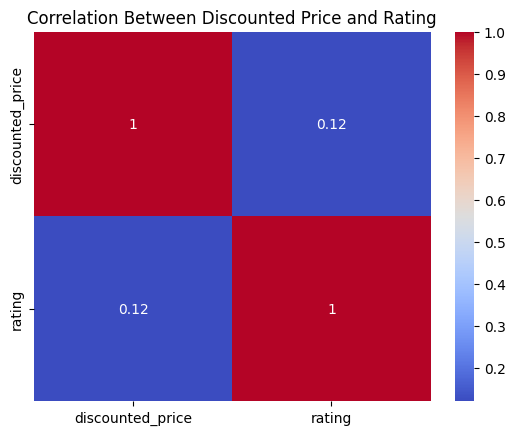

In [65]:
# 8. What is the correlation between discounted_price and rating?
# Convert 'discounted_price' to numeric, removing currency symbols and commas
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

corr_value = df[["discounted_price", "rating"]].corr()
sns.heatmap(corr_value, annot=True, cmap="coolwarm")
plt.title("Correlation Between Discounted Price and Rating")
plt.show()



In [63]:
# 9. What are the Top 5 categories based on the highest ratings?
top_5_categories = avg_rating_by_category.head(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_5_categories)


Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Missing Values in Each Column:
 product_id                0
product_name              0
category                  0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    1
rating_count           1139
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64


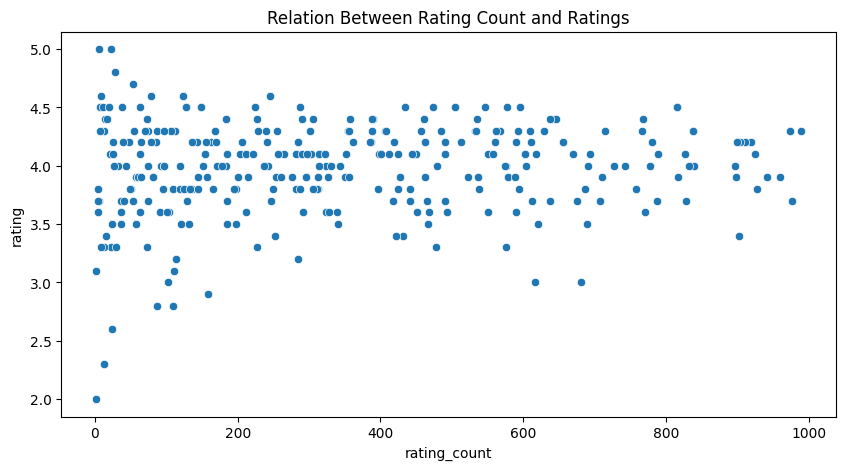

Categories with Lowest Discounts:
 category
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                       0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                             0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens            0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens    0.0
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                 0.0
Name: discount_percentage, dtype: float64


In [64]:
# 10. Identify potential areas for improvement based on data analysis
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check if high-rated products have lower reviews
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="rating_count", y="rating")
plt.title("Relation Between Rating Count and Ratings")
plt.show()

# Check if some categories have lower discounts
low_discount_categories = avg_discount_by_category.tail(5)
print("Categories with Lowest Discounts:\n", low_discount_categories)

- - - - -

##EDA - 4 (spotify Dataset)

In [69]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/PW_Skills/ML/M2/spotify.csv'
print(os.getcwd())
spotify_df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [70]:
# 1. Read the dataframe, check for null values, and handle them
print("Null values in each column:\n", spotify_df.isnull().sum())
spotify_df.dropna(inplace=True)  # Remove rows with missing values

Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [71]:
# 2. Check for duplicate rows and remove them
duplicates = spotify_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
spotify_df.drop_duplicates(inplace=True)

Number of duplicate rows: 27


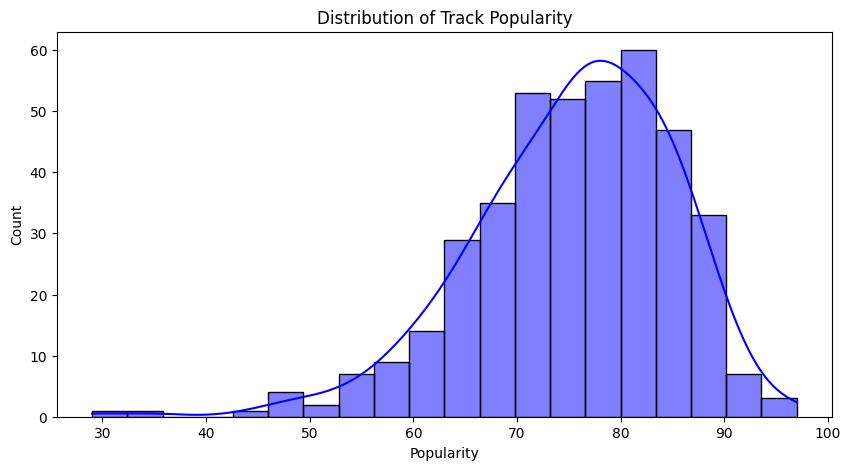

In [75]:
# 3. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(10, 5))
sns.histplot(spotify_df["Popularity"], bins=20, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

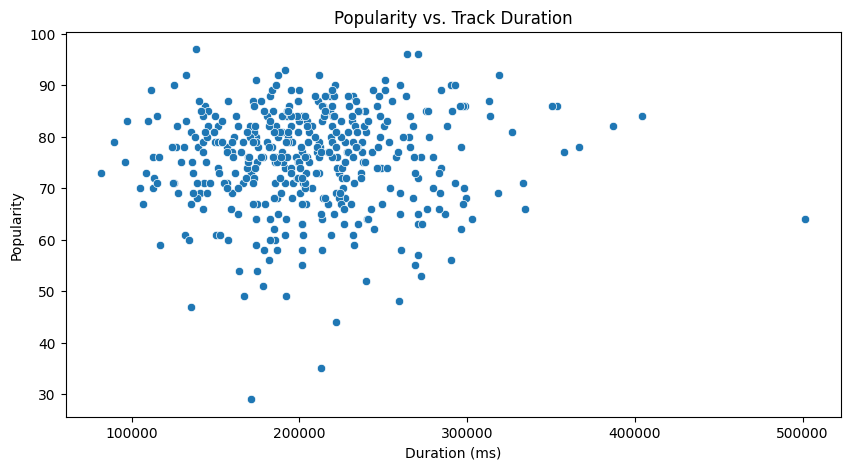

In [78]:
# 4. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=spotify_df["Duration (ms)"], y=spotify_df["Popularity"])
plt.title("Popularity vs. Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

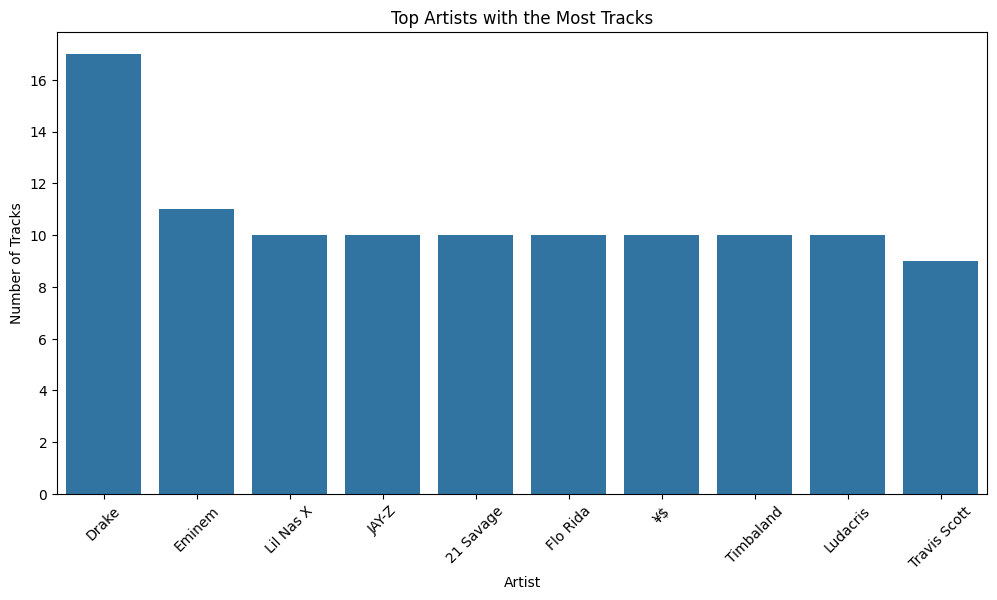

In [79]:
# 5. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12, 6))
top_artists = spotify_df["Artist"].value_counts().nlargest(10)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45)
plt.title("Top Artists with the Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.show()

In [81]:
# 6. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = spotify_df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [82]:
# 7. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists_avg_popularity = spotify_df.groupby("Artist")["Popularity"].mean().nlargest(5)
print("Top 5 Most Popular Artists (Average Popularity):\n", top_artists_avg_popularity)


Top 5 Most Popular Artists (Average Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [83]:
# 8. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
most_popular_tracks = spotify_df.loc[spotify_df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]]
top_5_artists = top_artists_avg_popularity.index
print("Most Popular Tracks of Top 5 Artists:\n", most_popular_tracks[most_popular_tracks["Artist"].isin(top_5_artists)])


Most Popular Tracks of Top 5 Artists:
            Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


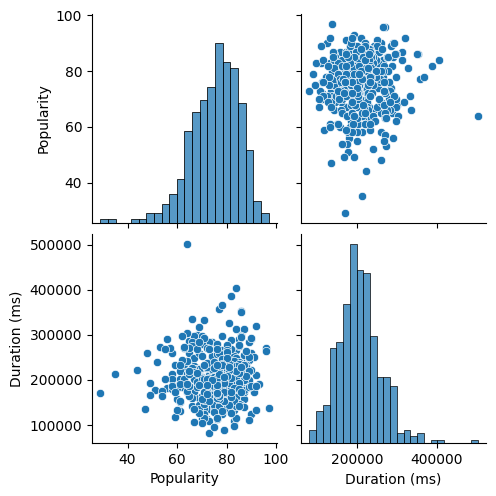

In [84]:
# 9. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(spotify_df[["Popularity", "Duration (ms)"]])
plt.show()


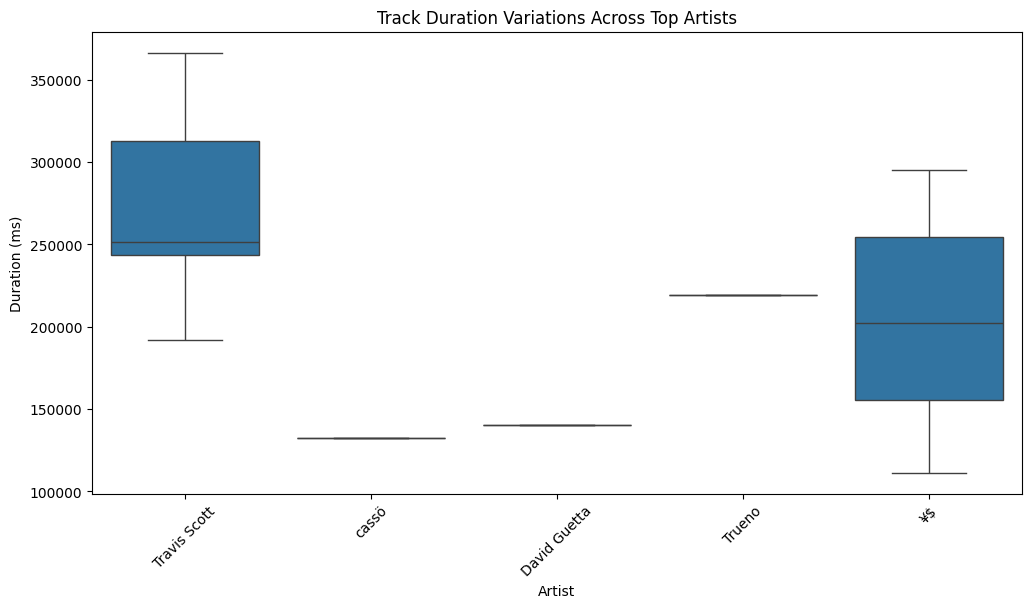

In [85]:
# 10. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot.
plt.figure(figsize=(12, 6))
top_artists_filtered = spotify_df[spotify_df["Artist"].isin(top_5_artists)]
sns.boxplot(x="Artist", y="Duration (ms)", data=top_artists_filtered)
plt.xticks(rotation=45)
plt.title("Track Duration Variations Across Top Artists")
plt.show()

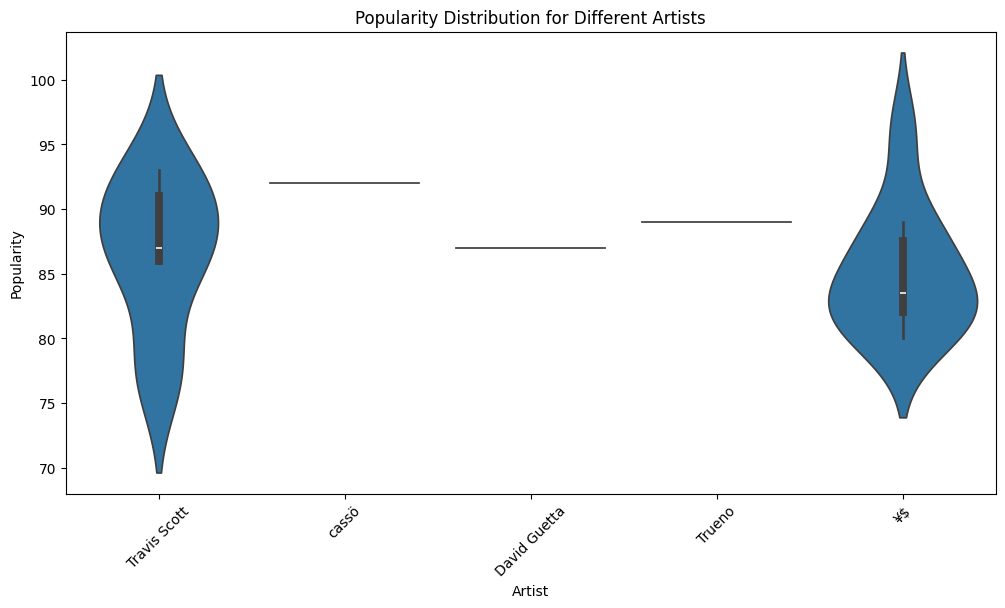

In [86]:
# 11. How does the distribution of track popularity vary for different artists? Visualize this using a violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=top_artists_filtered)
plt.xticks(rotation=45)
plt.title("Popularity Distribution for Different Artists")
plt.show()